<a href="https://colab.research.google.com/github/SofiMich/DL/blob/main/T1_Michaelian_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. XNOR
Para el primer ejercicio de la tarea vamos a entrenar una red de neuronas con funciones de activación escalón unitario que aproxime la operación XNOR (⊙) dada por:

| $x_1$ | $x_2$ | $y$
| ------------- |:-------------:| -----:|
|0 |0 |1|
|0 |1 |0|
|1 |0 |0|
|1 |1 |1|

Esto usando la función escalón:

$$
h(z)=
    \begin{cases}
        1 & \text{si } z \geq 0\\
        0 & \text{si } z < 0.
    \end{cases}
$$

Como XOR es un problema de clsificación no lineal (como se ve en la siguiente imagen), necesitaremos más de una capa para emular su funcionamiento.

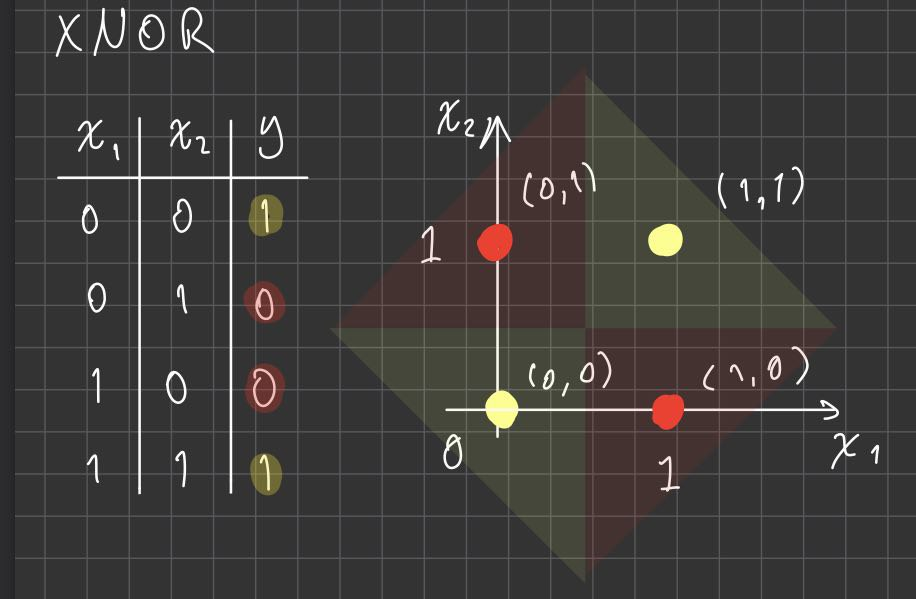

Vamos a usar una combinación de otras compuertas lógicas para esto:
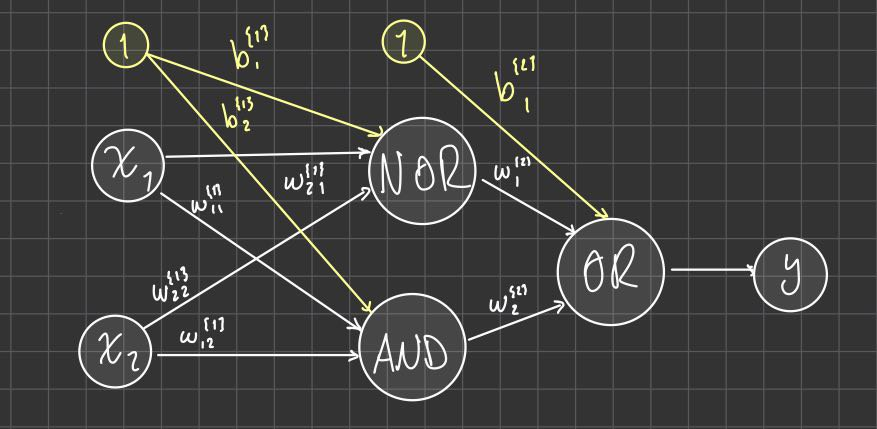

En clase vimos la compuerta AND, usando los siguientes pesos:

$b^{\{1\}}_2 = -1.5$

$w^{\{1\}}_{11}= 1$

$w^{\{1\}}_{12}= 1$


#Para la compuerta OR usaremos:
$b^{\{2\}} = -0.5$

$w^{\{2\}}_{1}= 1$

$w^{\{2\}}_{1}= 1$

Así la propagación hacia adelante queda de la siguiente manera:

| $x_1$ | $x_2$ | $y$ | $b + w_1 x_1 + w_{1} x_2$ | $ h $ $(z$$) $ |
|-------|-------|-----|---------------------------|--------|
| 0 | 0 | 0 | $ - 0.5 + 1(0) + 1(0) = - 0.5 < 0 $ | 0 |
| 0 | 1 | 1 | $ - 0.5 + 1(1) + 1(0) = 0.5 > 0 $   | 1 | 
| 1 | 0 | 1 | $ - 0.5 + 1(0) + 1(1) = 0.5 > 0 $   | 1 |
| 1 | 1 | 1 | $ - 0.5 + 1(1) + 1(1) = 1 > 0 $     | 1 | 

#La compuerta NOR usaremos:
$b^{\{1\}}_1 = 0.5$

$w^{\{1\}}_{21}= -1$

$w^{\{1\}}_{22}= -1$

Así la propagación hacia adelante queda de la siguiente manera:

| $x_1$ | $x_2$ | $y$ | $b + w_1 x_1 + w_{1} x_2$ | $ h $ $(z$$) $ |
|-------|-------|-----|---------------------------|--------|
| 0 | 0 | 1 | $  0.5 - 1(0) - 1(0) = 0.5 > 0 $  | 1 |
| 0 | 1 | 0 | $  0.5 - 1(1) - 1(0) = -0.5 < 0 $ | 0 | 
| 1 | 0 | 0 | $  0.5 - 1(0) - 1(1) = -0.5 < 0 $ | 0 |
| 1 | 1 | 0 | $  0.5 - 1(1) - 1(1) = -1.5 < 0 $ | 0 | 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Definimos nuestra función de activación:

In [ ]:
def h(z):
  e = np.where( z > 0,1,0)
  return e

Se ve así:

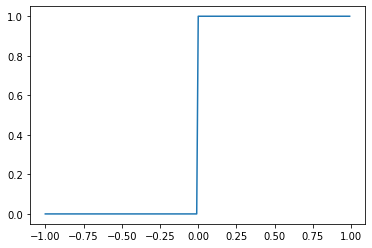

In [ ]:
z = np.arange(-1, 1, 0.01)
plt.plot(z, h(z))

## Propagación hacia adelante

Ahora, definimos la función que propaga hacia adelante una entrada $\mathbf{x}$. Tenemos 2 matrices de pesos con sus correspondientes vectores de sesgos $\{\mathbf{W}^{\{1\}}, \mathbf{b}^{\{1\}}\}$ y $\{\mathbf{W}^{\{2\}}, \mathbf{b}^{\{2\}}\}$ de la capa oculta (AND y NOR) y la capa de salida (NOR) respectivamente. La propagación hacia adelante se hace de la siguiente manera:

$$
	\begin{split}
				\mathbf{a}^{\{1\}} & =  \mathbf{x} \\
				\mathbf{z}^{\{2\}} & =  \mathbf{W}^{\{1\}} \cdot \mathbf{a}^{\{1\}} + \mathbf{b}^{\{1\}}\\
				\mathbf{a}^{\{2\}} & =  \sigma(\mathbf{z}^{\{2\}}) \\
				\mathbf{z}^{\{3\}} & =  \mathbf{W}^{\{2\}} \cdot \mathbf{a}^{\{2\}}  + \mathbf{b}^{\{2\}}\\
				\mathbf{a}^{\{3\}} & =  \sigma(\mathbf{z}^{\{3\}})\\
				\hat{y} & =  \mathbf{a}^{\{3\}}
			\end{split}
$$

Ahora definimos nuestras matrices de pesos con lo discutido anteriormente:

In [ ]:
W1 = np.array([[1,1],[-1,-1]])
b1 = np.array([-1.5,0.5])

W2 = np.array([1,1])
b2 = -0.5

Y definimos nuestra función XNOR:

In [ ]:
def xnor(x):
    z2 = np.dot(W1, x) + b1
    a2 = h(z2)
    z3 = np.dot(W2, a2) + b2
    y_hat = h(z3)
    return y_hat

Ahora probamos nuestra red:

In [ ]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

In [ ]:
for i in X:
  y = xnor(i)
  print('XOR({0}) = {1}'.format(i, y))

XOR([0 0]) = 1
XOR([0 1]) = 0
XOR([1 0]) = 0
XOR([1 1]) = 1


Hemos simulado la compuerta XNOR exitosamente usando una composición entre otras compuertas lógicas. Mientras que XNOR no es linealmente separable, las otras compuertas sí lo son, y es gracias a que entre una capa y otra usamos una función de activación no lieal que podemos simular a XNOR.